In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy import inf

# Part 1

In [2]:
#Generate N x_i according to a gaussian distribution with mu=1 and sigma=0.2
N=10
mu=1
sigma=0.2
data = np.random.normal(mu, sigma, N)

In [3]:
data

array([1.00867529, 0.91430077, 1.27761278, 1.01598214, 0.86517093,
       1.26018629, 1.16311072, 1.20097059, 1.05207432, 1.02711217])

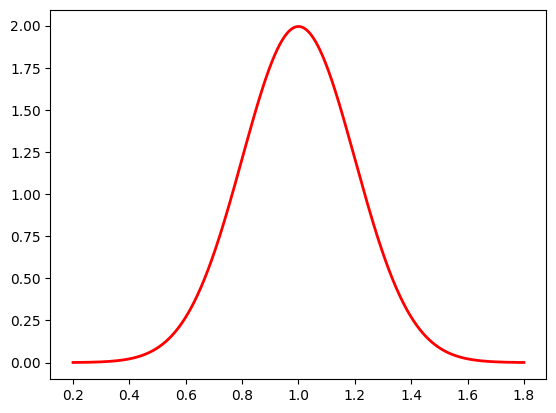

In [4]:
#Let's plot the gaussian

# Create a range of values
N_x = 1000
grid=np.linspace(mu - 4*sigma, mu + 4*sigma, N_x) #Range along x axis

# Compute the Gaussian curve (PDF)
pdf = norm.pdf(grid, mu, sigma)

# Plot the Gaussian curve
plt.plot(grid, pdf, 'r', linewidth=2)

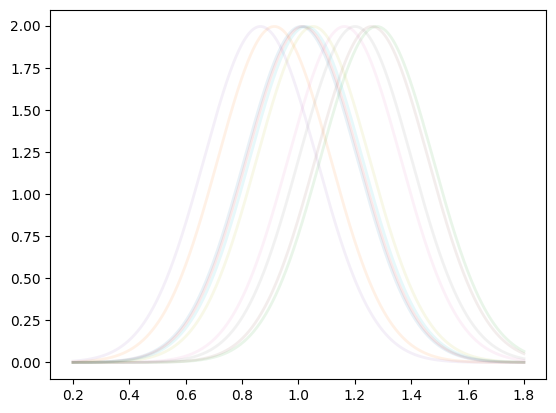

In [5]:
#Centre a Gaussian (with the known sigma) at each point
for i in range(len(data)):
    pdf = norm.pdf(grid, data[i], sigma)
    plt.plot(grid, pdf, linewidth=2, alpha=0.1)

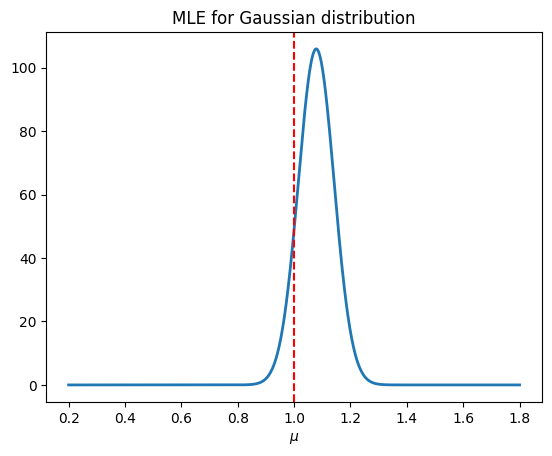

In [6]:
#Plot the product of the pdf of the dataset (e.g. multiply all the pdfs' values at a certain x)
L=np.ones(N_x) #Initialise the array where to save the multiplication of pdf(x_i) → that's the likelihood
for i in range(len(data)):
    pdf = norm.pdf(grid, data[i], sigma)
    L= L*pdf
plt.plot(grid, L, linewidth=2)
plt.axvline(mu, color='r', linestyle='--')
plt.title(r'MLE for Gaussian distribution')
plt.xlabel(r'$\mu$')
plt.show()

In [7]:
#Obtain the maximum of the likelihood
sorted_indexes=np.argsort(L)
max_likelihood_index = sorted_indexes[-1]
print('By Likelihood:', grid[max_likelihood_index])
print('By mean:', np.mean(data))

By Likelihood: 1.0792792792792794
By mean: 1.0785195987160345


# Part 2

In [8]:
#We find the Fisher error with a quick calculation
log_L = np.log(L)
log_L[log_L == -inf] = 0 #We substitute '-inf' with '0'
F_sigma = np.diff(log_L, n=2)
F_sigma /= np.power(grid[1] - grid[0], 2)
F_sigma *= -1
F_sigma = 1 / np.sqrt(F_sigma)[max_likelihood_index]
print('Fisher matrix error estimate is %.3f' % F_sigma)

Fisher matrix error estimate is 0.063


In [9]:
#MLE Fisher matrix error
MLE_sigma = sigma / np.power(N, 0.5)
print('Fisher matrix error', MLE_sigma)

Fisher matrix error 0.06324555320336758


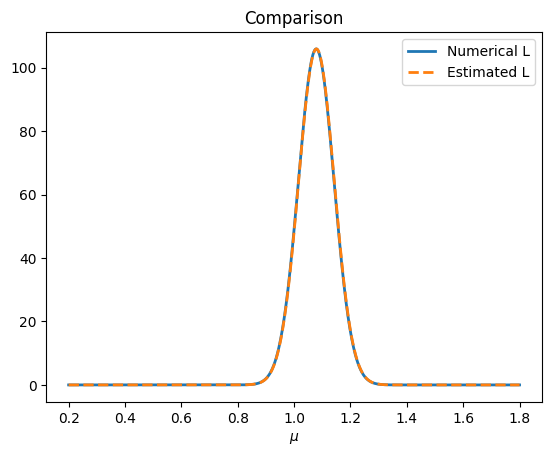

In [10]:
#Compare the numerical likelihood with the estimated one

#Numerical
plt.plot(grid, L, linewidth=2, linestyle = '-', label = r'Numerical L')

#Estimated
Lfit = norm.pdf(grid, loc = grid[max_likelihood_index], scale = MLE_sigma)
C = np.max(L) / np.max(Lfit) #Scale constant
plt.plot(grid, C*Lfit, linewidth=2, linestyle = '--', label = r'Estimated L')

plt.legend()
plt.title(r'Comparison')
plt.xlabel(r'$\mu$')
plt.show()